Decision Tree Classifier Evaluation:
Accuracy: 0.8833333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.95      0.93      0.94        57

    accuracy                           0.88        60
   macro avg       0.47      0.46      0.47        60
weighted avg       0.90      0.88      0.89        60



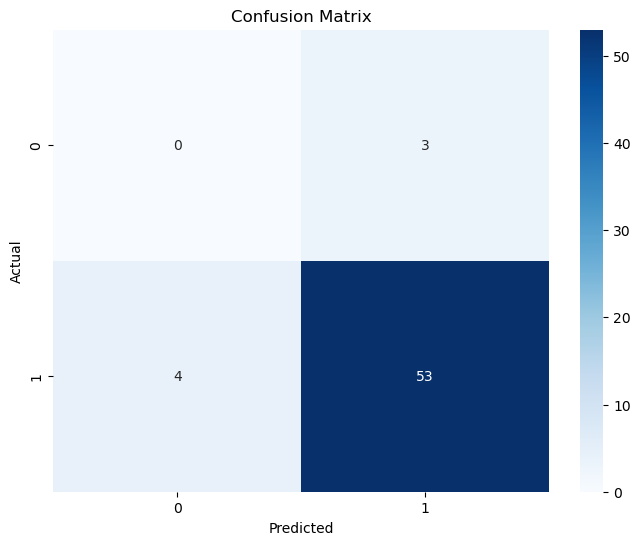

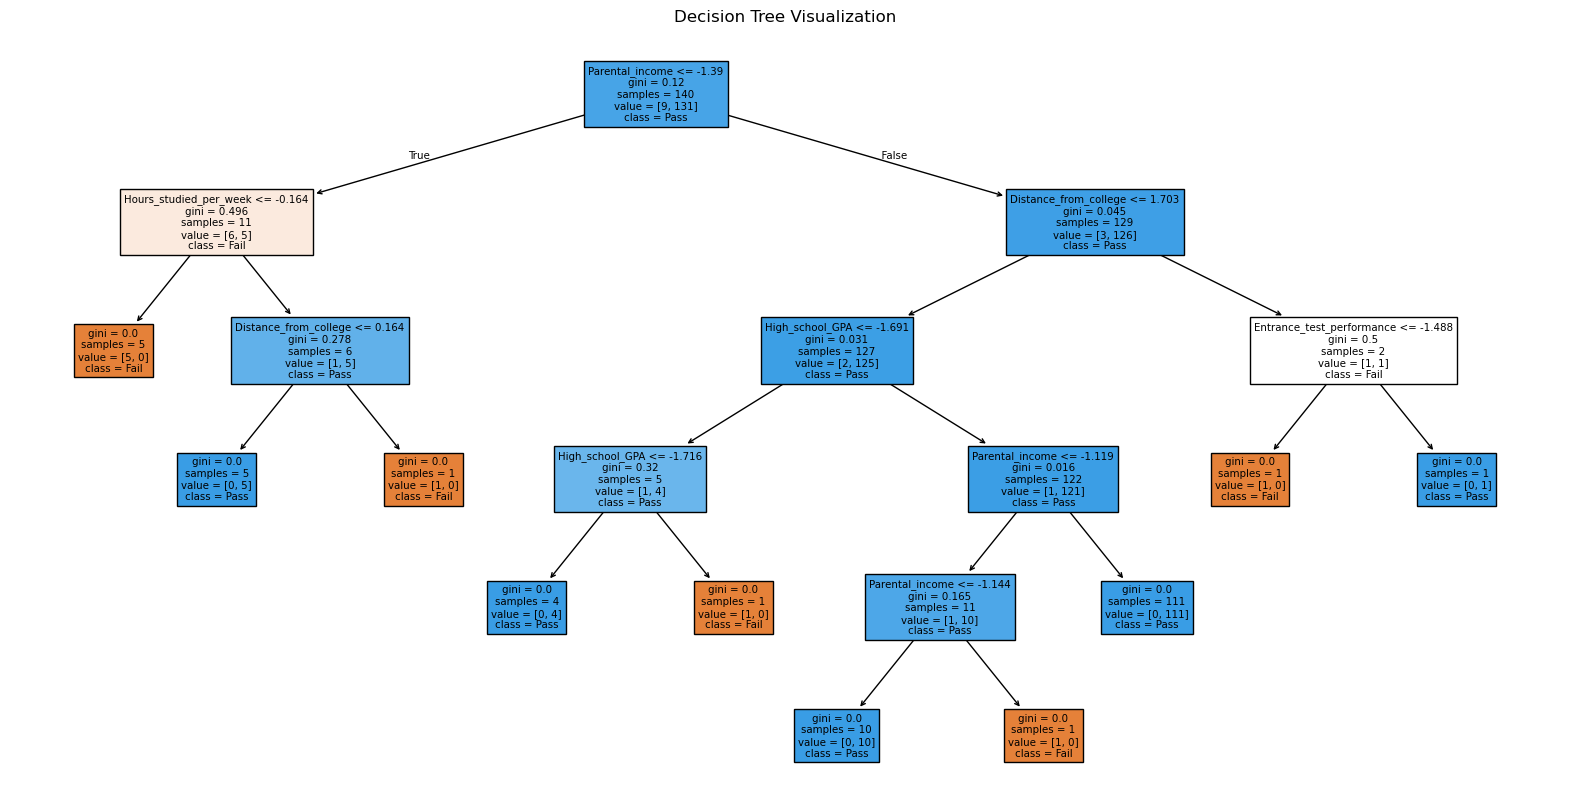


Feature Importance:
                      Feature  Importance
2             Parental_income    0.445973
3      Hours_studied_per_week    0.224895
5       Distance_from_college    0.153782
0             High_school_GPA    0.115978
4   Entrance_test_performance    0.059372
1  Extracurricular_activities    0.000000
6       Internet_availability    0.000000


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Generate synthetic data (same as before for comparison)
def create_sample_data(n_samples=200):
    high_school_gpa = np.random.uniform(2.0, 4.0, n_samples)
    extracurricular_activities = np.random.randint(0, 6, n_samples)
    parental_income = np.random.uniform(20000, 120000, n_samples)
    hours_studied_per_week = np.random.uniform(5, 30, n_samples)
    entrance_test_performance = np.random.uniform(50, 100, n_samples)
    distance_from_college = np.random.uniform(0, 50, n_samples)
    internet_availability = np.random.choice([0, 1], n_samples, p=[0.2, 0.8])
    
    data = pd.DataFrame({
        'High_school_GPA': high_school_gpa,
        'Extracurricular_activities': extracurricular_activities,
        'Parental_income': parental_income,
        'Hours_studied_per_week': hours_studied_per_week,
        'Entrance_test_performance': entrance_test_performance,
        'Distance_from_college': distance_from_college,
        'Internet_availability': internet_availability
    })
    
    z = (0.8 * high_school_gpa + 
         0.3 * extracurricular_activities + 
         0.0001 * parental_income + 
         0.05 * hours_studied_per_week + 
         0.02 * entrance_test_performance - 
         0.03 * distance_from_college + 
         0.2 * internet_availability - 6)
    
    prob = 1 / (1 + np.exp(-z))
    final_year_result = np.random.binomial(1, prob)
    data['Final_year_result'] = final_year_result
    
    return data

# Create the dataset
student_data = create_sample_data(200)

# Split data into features and target
X = student_data.drop('Final_year_result', axis=1)
y = student_data['Final_year_result']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Fail', 'Pass'])
plt.title('Decision Tree Visualization')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_classifier.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))
